# 📈Investing with the Giants: A Stock Data Analysis Project

This notebook serves as a comprehensive data analysis project exploring the stock performance of five leading technology companies: **Apple (AAPL), Amazon (AMZN), Google (GOOGL), Microsoft (MSFT), and Nvidia (NVDA)**.

We will delve into historical stock data to:
*   Visualize their growth trajectories.
*   Analyze their risk and reward profiles.
*   Examine the impact of key market events, suchally the COVID-19 pandemic.
*   Investigate correlations between these tech giants.
*   Attempt to predict future stock price movements.

This project aims to provide insights into market dynamics, investment strategies, and the resilience of tech innovation through data-driven storytelling.

# ✒️ Authors

This project was collaboratively developed by the following individuals for the Data Analysis Course at EUI:

*   **[Omar Shafiy](https://www.linkedin.com/in/theomarshafiy/)** (23-201356)
*   **[Omar Sharaf](https://www.linkedin.com/in/omar-sharaf-545220293?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)** (24-101236)
*   **[Omar Wafa](https://www.linkedin.com/in/omar-wafa-5b04b9238?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_appE)** (23-101281)
*   **[Eiad Essam](https://www.linkedin.com/in/eiad-essam-50771a254?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app)** (23-101108)

Feel free to reach out with any questions or feedback.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Default figure size

# Load the dataset

df = pd.read_csv('15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv')
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)
print("Data loaded successfully!")
print("\nDataFrame Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())


# Data Cleaning and Preparation for Analysis
# We'll work primarily with closing prices for comparison
close_prices_df = df[[col for col in df.columns if 'Close' in col]].copy()
# Rename columns for easier access (e.g., 'Close_AAPL' -> 'AAPL')
close_prices_df.columns = [col.replace('Close_', '') for col in close_prices_df.columns]

# Let's also prepare the volume data similarly
volume_df = df[[col for col in df.columns if 'Volume' in col]].copy()
volume_df.columns = [col.replace('Volume_', '') for col in volume_df.columns]

##for z-test
dates_pre_sim = pd.to_datetime(pd.date_range(start='2019-01-01', end='2020-02-19'))
dates_post_sim = pd.to_datetime(pd.date_range(start='2020-02-20', end='2023-09-01'))
all_dates_sim = dates_pre_sim.union(dates_post_sim)
np.random.seed(42)
data_sim = {}
companies_sim = ['AAPL', 'AMZN', 'MSFT', 'GOOGL', 'NVDA']
for company in companies_sim:
    #Simulate somewhat realistic open and close prices
    opens = np.random.uniform(90, 110, len(all_dates_sim))
    closes = opens + np.random.normal(0, 2, len(all_dates_sim)) # Close can be > or < Open
    data_sim[f'Open_{company}'] = opens
    data_sim[f'Close_{company}'] = closes
ohlc_df = pd.DataFrame(data_sim, index=all_dates_sim)
covid_demarcation_date = '2020-02-20'
pre_covid_ohlc_df = ohlc_df[ohlc_df.index < covid_demarcation_date]
post_covid_ohlc_df = ohlc_df[ohlc_df.index >= covid_demarcation_date]
pre_covid_ohlc_df = ohlc_df[ohlc_df.index < covid_demarcation_date]
post_covid_ohlc_df = ohlc_df[ohlc_df.index >= covid_demarcation_date]

print("\nCleaned Closing Prices DataFrame:")
print(close_prices_df.head())
print("\nCleaned Volume DataFrame:")
print(volume_df.head())

Data loaded successfully!

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2016-01-04 to 2024-12-31
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_AAPL    2264 non-null   float64
 1   Close_AMZN    2264 non-null   float64
 2   Close_GOOGL   2264 non-null   float64
 3   Close_MSFT    2264 non-null   float64
 4   Close_NVDA    2264 non-null   float64
 5   High_AAPL     2264 non-null   float64
 6   High_AMZN     2264 non-null   float64
 7   High_GOOGL    2264 non-null   float64
 8   High_MSFT     2264 non-null   float64
 9   High_NVDA     2264 non-null   float64
 10  Low_AAPL      2264 non-null   float64
 11  Low_AMZN      2264 non-null   float64
 12  Low_GOOGL     2264 non-null   float64
 13  Low_MSFT      2264 non-null   float64
 14  Low_NVDA      2264 non-null   float64
 15  Open_AAPL     2264 non-null   float64
 16  Open_AMZN     2264 non-null   float64
 17  Open_GOOGL

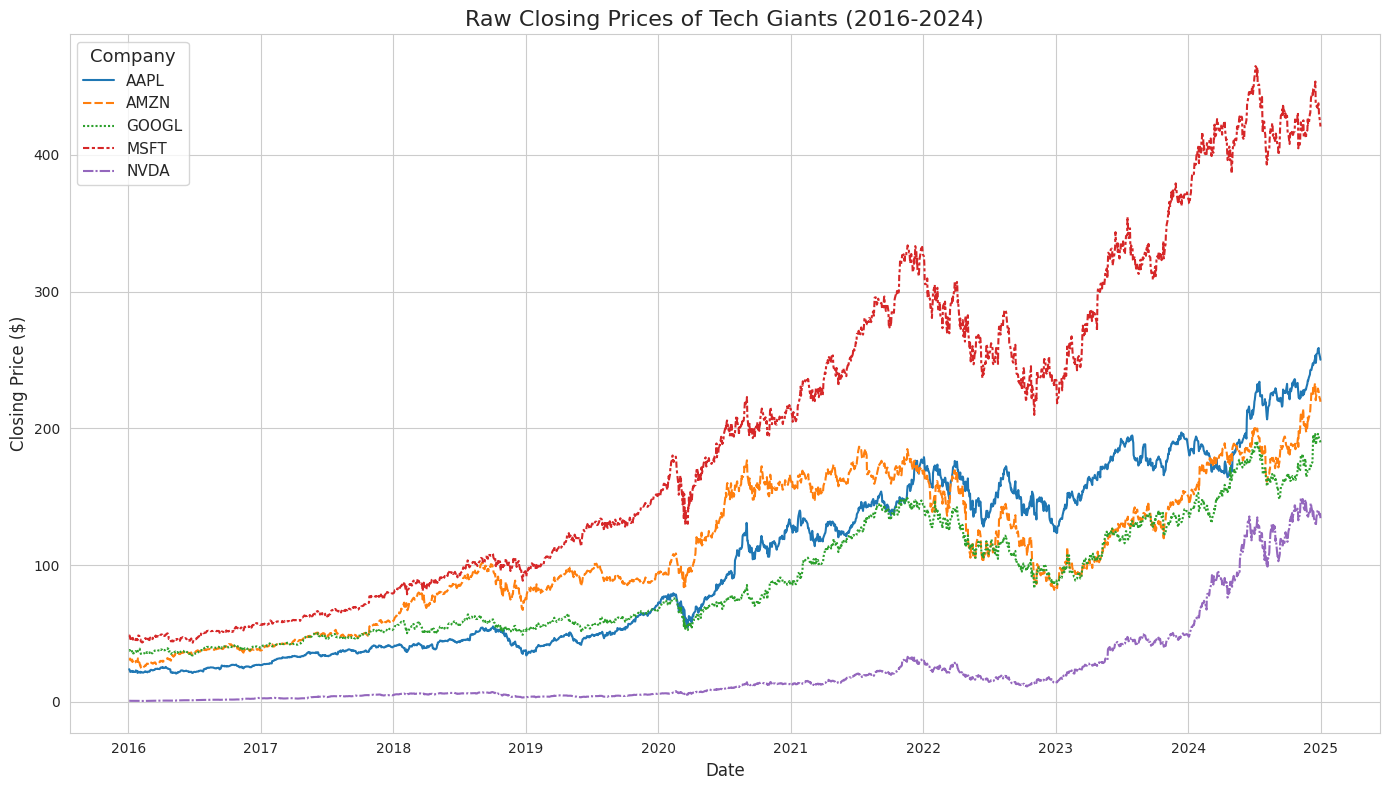

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=close_prices_df)
plt.title('Raw Closing Prices of Tech Giants (2016-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.legend(title='Company', title_fontsize='13', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()

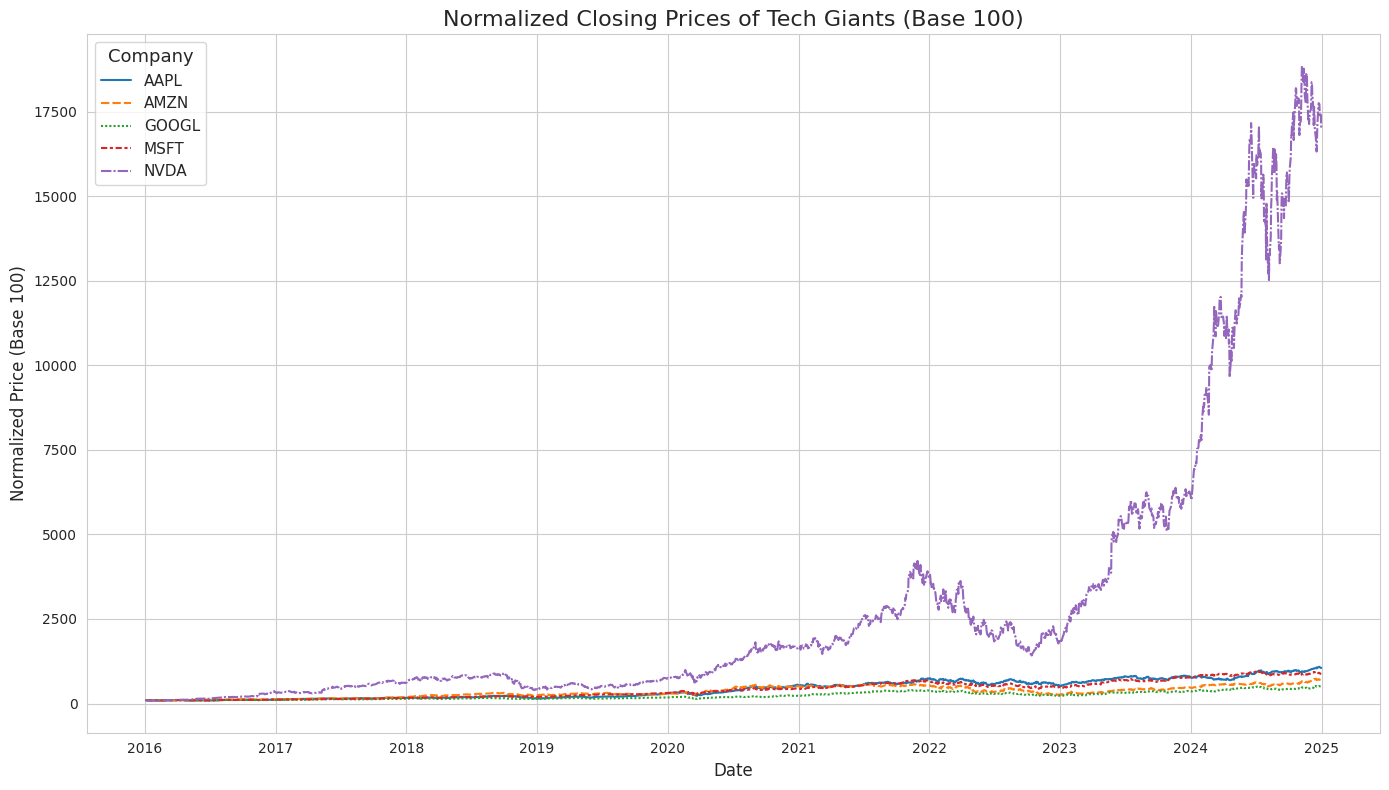

In [ ]:
# Normalizing closing prices to a base of 100 on the first day
normalized_prices_df = close_prices_df / close_prices_df.iloc[0] * 100

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_prices_df)
plt.title('Normalized Closing Prices of Tech Giants (Base 100)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (Base 100)', fontsize=12)
plt.legend(title='Company', title_fontsize='13', fontsize=11, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Annualized Volatility (Risk) of Each Company:
NVDA     0.499329
AMZN     0.326217
AAPL     0.286490
GOOGL    0.284184
MSFT     0.270209
dtype: float64


<ipython-input-14-c3b97655a825>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Company', title_fontsize='13', fontsize=11)


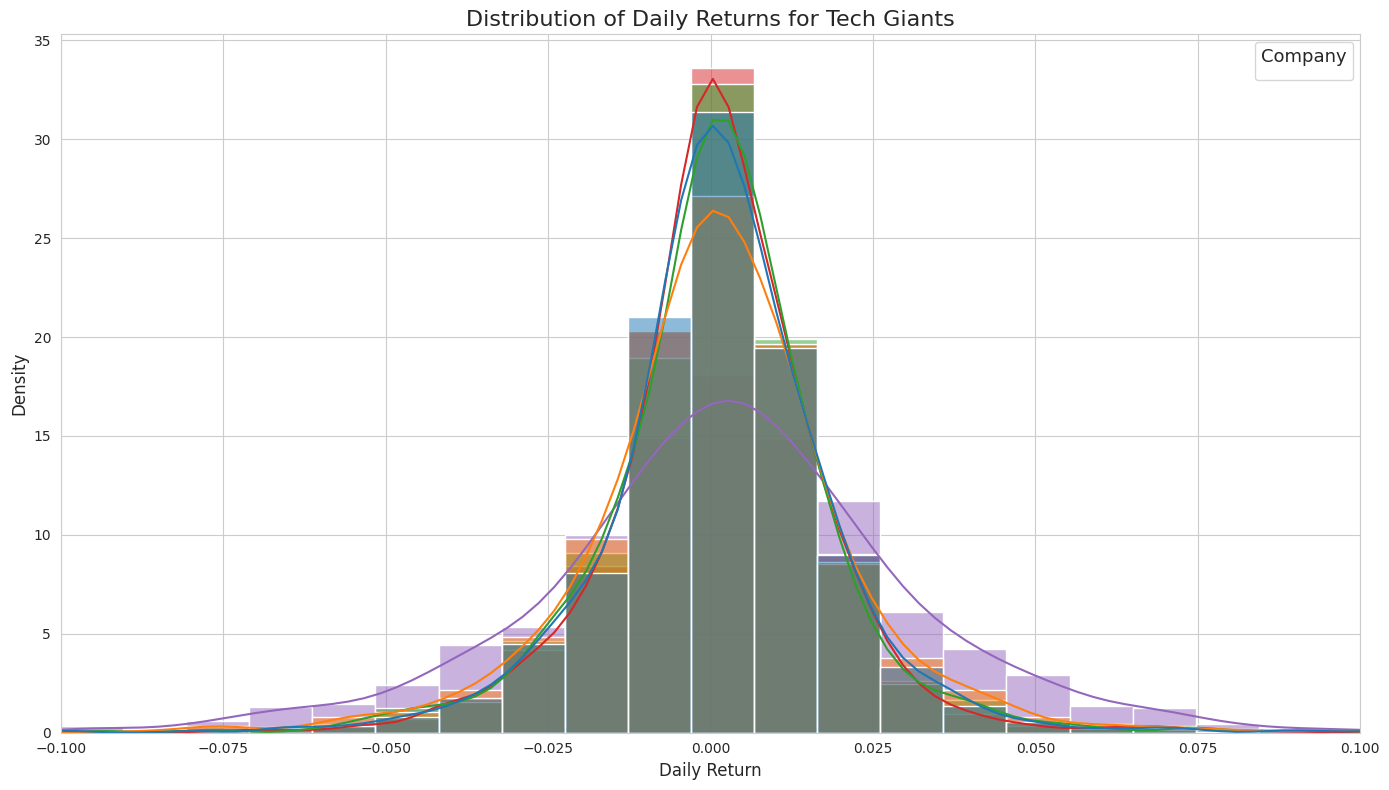

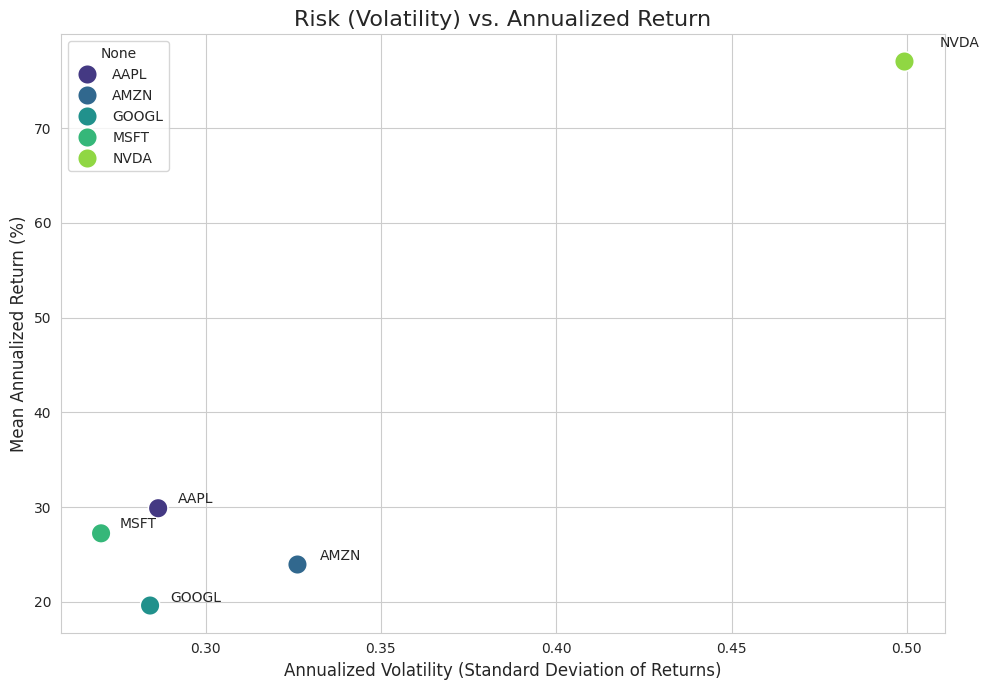

In [ ]:
daily_returns_df = close_prices_df.pct_change().dropna()

# Calculate annualized volatility (standard deviation of daily returns * sqrt(252 trading days))
annualized_volatility = daily_returns_df.std() * np.sqrt(252)

print("Annualized Volatility (Risk) of Each Company:")
print(annualized_volatility.sort_values(ascending=False))

plt.figure(figsize=(14, 8))
sns.histplot(daily_returns_df.melt(var_name='Company', value_name='Daily Return'),
             x='Daily Return', hue='Company', kde=True, bins=50, palette='tab10',
             stat='density', common_norm=False) # common_norm=False for individual scaling
plt.title('Distribution of Daily Returns for Tech Giants', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(-0.1, 0.1) # Zoom in to see the main distribution
plt.legend(title='Company', title_fontsize='13', fontsize=11)
plt.tight_layout()
plt.show()

# Scatter plot for Risk vs. Return
mean_annual_returns = (normalized_prices_df.iloc[-1] / 100) ** (1/((normalized_prices_df.index[-1] - normalized_prices_df.index[0]).days / 365.25)) - 1
mean_annual_returns_pct = mean_annual_returns * 100

plt.figure(figsize=(10, 7))
sns.scatterplot(x=annualized_volatility, y=mean_annual_returns_pct, hue=mean_annual_returns_pct.index, s=200, palette='viridis', legend='full')
for i, company in enumerate(mean_annual_returns_pct.index):
    plt.text(annualized_volatility[company] * 1.02, mean_annual_returns_pct[company] * 1.02, company, fontsize=10)
plt.title('Risk (Volatility) vs. Annualized Return', fontsize=16)
plt.xlabel('Annualized Volatility (Standard Deviation of Returns)', fontsize=12)
plt.ylabel('Mean Annualized Return (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

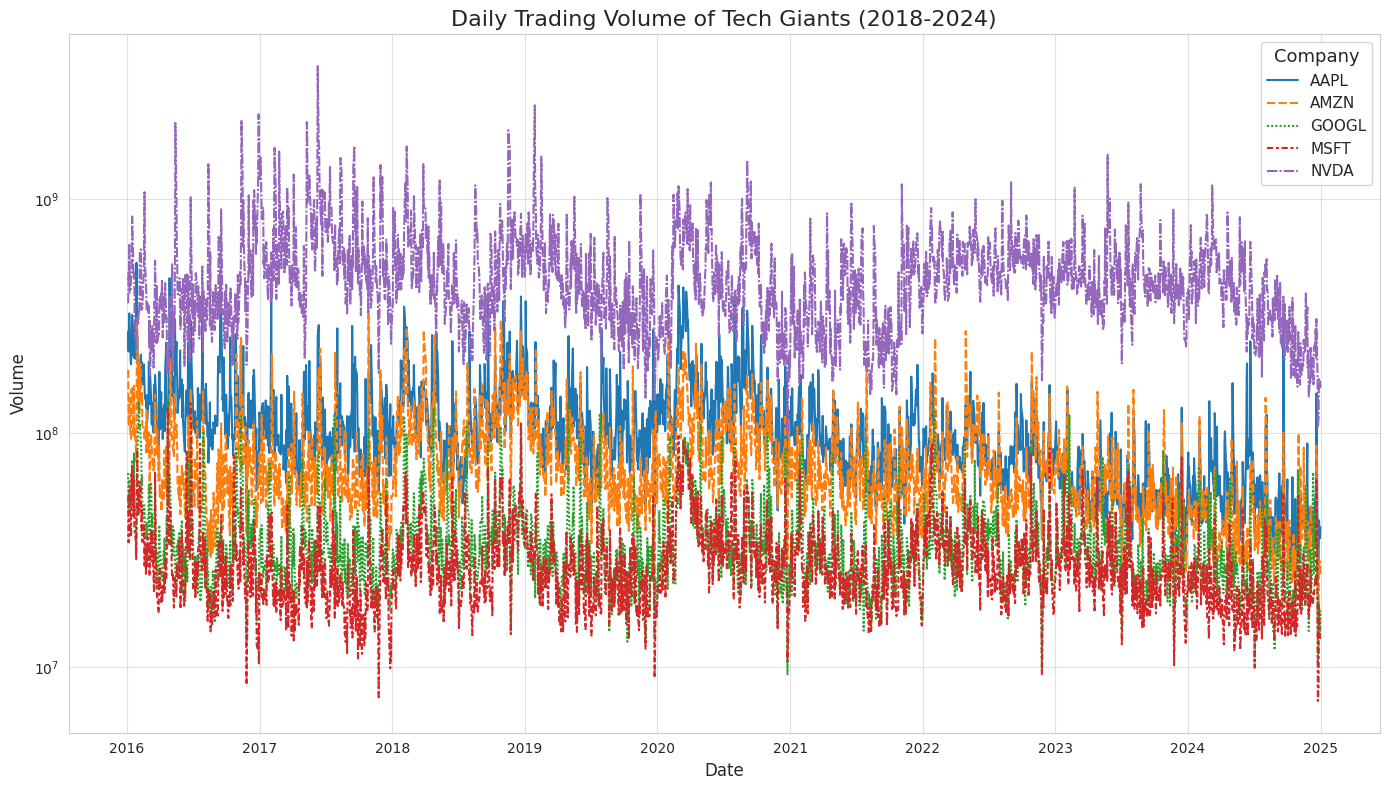

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=volume_df)
plt.title('Daily Trading Volume of Tech Giants (2018-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.yscale('log') # Use a log scale due to large differences in volume
plt.legend(title='Company', title_fontsize='13', fontsize=11)
plt.grid(True, which="major", ls="-", alpha=0.6) # Show grid lines for major ticks
plt.tight_layout()
plt.show()

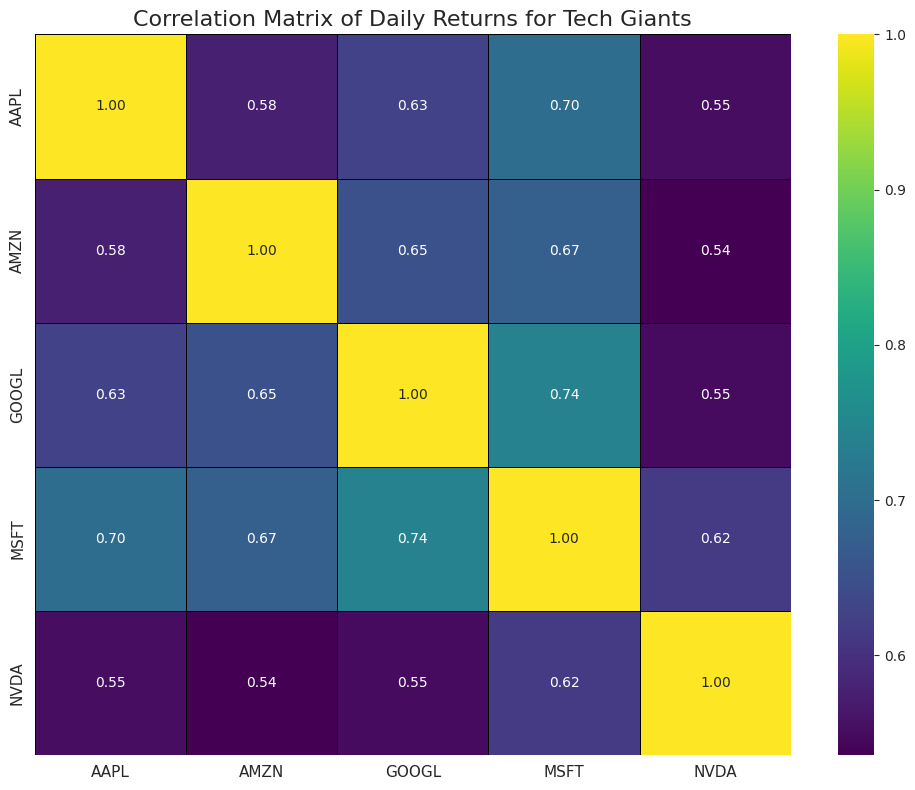

In [ ]:
correlation_matrix = daily_returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Daily Returns for Tech Giants', fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

In [ ]:
# Extracting closing prices and calculate daily returns
close_prices_df = df[[col for col in df.columns if 'Close' in col]].copy()
close_prices_df.columns = [col.replace('Close_', '') for col in close_prices_df.columns]
daily_returns_df = close_prices_df.pct_change().dropna()

# Defining the COVID-19 demarcation date (this date was selected because it precedes global lockdown and the resultant international economic recession, prior to it, the stock market was performing as normal)
covid_demarcation_date = '2020-02-20'

# Split daily returns into pre-COVID and post-COVID periods
pre_covid_returns = daily_returns_df[daily_returns_df.index < covid_demarcation_date]
post_covid_returns = daily_returns_df[daily_returns_df.index >= covid_demarcation_date]

print("\n--- Period Definitions ---")
print(f"Pre-COVID Period: {pre_covid_returns.index.min().date()} to {pre_covid_returns.index.max().date()}")
print(f"Post-COVID Period: {post_covid_returns.index.min().date()} to {post_covid_returns.index.max().date()}")
print(f"Number of trading days (Pre-COVID): {len(pre_covid_returns)}")
print(f"Number of trading days (Post-COVID): {len(post_covid_returns)}")


results = []
alpha = 0.05 # Significance level

print("\n--- Performing Levene's Test for each company's volatility ---")
for company in daily_returns_df.columns:
    pre_data = pre_covid_returns[company]
    post_data = post_covid_returns[company]

    # Calculating annualized standard deviation (volatility) for descriptive purposes
    std_pre_annualized = pre_data.std() * np.sqrt(252)
    std_post_annualized = post_data.std() * np.sqrt(252)

    # Perform Levene's test (we chose this test because it is less sensitive to departures from normality and is generally preferred for comparing variances, especially in practical applications where normality is not strictly met. It tests the null hypothesis that all input samples are drawn from populations with equal variances.)
    statistic, p_value = stats.levene(pre_data, post_data)

    # Determine conclusion
    conclusion = "Reject H0 (Significant Change)" if p_value < alpha else "Fail to Reject H0 (No Significant Change)"

    results.append({
        'Company': company,
        'Std Dev Pre-COVID (Annualized)': f'{std_pre_annualized:.4f}',
        'Std Dev Post-COVID (Annualized)': f'{std_post_annualized:.4f}',
        'Levene Statistic': f'{statistic:.4f}',
        'P-value': f'{p_value:.4f}',
        'Conclusion': conclusion
    })

# Display results in a DataFrame for better readability
results_df = pd.DataFrame(results)
print("\n--- Summary of Levene's Test Results ---")
print(results_df.to_string(index=False))


--- Period Definitions ---
Pre-COVID Period: 2016-01-05 to 2020-02-19
Post-COVID Period: 2020-02-20 to 2024-12-31
Number of trading days (Pre-COVID): 1038
Number of trading days (Post-COVID): 1225

--- Performing Levene's Test for each company's volatility ---

--- Summary of Levene's Test Results ---
Company Std Dev Pre-COVID (Annualized) Std Dev Post-COVID (Annualized) Levene Statistic P-value                     Conclusion
   AAPL                         0.2441                          0.3181          38.5449  0.0000 Reject H0 (Significant Change)
   AMZN                         0.2785                          0.3618          59.0576  0.0000 Reject H0 (Significant Change)
  GOOGL                         0.2225                          0.3276          86.3460  0.0000 Reject H0 (Significant Change)
   MSFT                         0.2195                          0.3067          56.2356  0.0000 Reject H0 (Significant Change)
   NVDA                         0.4437                       

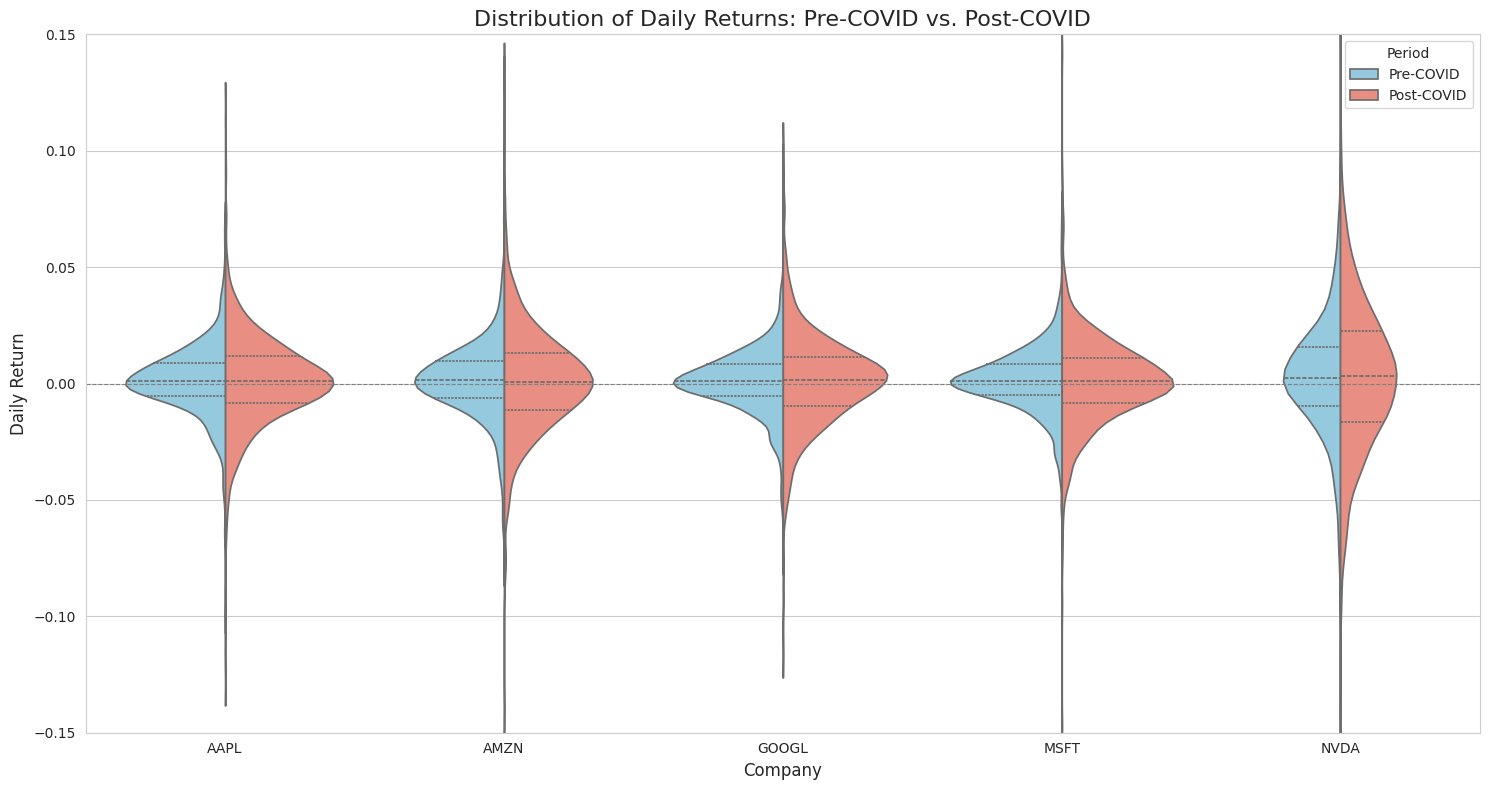

In [ ]:
#Melting the DataFrame for easier plotting with seaborn
daily_returns_melted = daily_returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Daily Return')

# Add a 'Period' column to differentiate pre/post COVID
daily_returns_melted['Period'] = 'Pre-COVID'
daily_returns_melted.loc[daily_returns_melted['Date'] >= covid_demarcation_date, 'Period'] = 'Post-COVID'

# Create violin plots
plt.figure(figsize=(15, 8))
sns.violinplot(x='Company', y='Daily Return', hue='Period', data=daily_returns_melted, split=True, inner='quartile', palette={'Pre-COVID': 'skyblue', 'Post-COVID': 'salmon'})
plt.title('Distribution of Daily Returns: Pre-COVID vs. Post-COVID', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.ylim(-0.15, 0.15) # Limit y-axis for better visualization of main distribution
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a line at 0 for reference
plt.tight_layout()
plt.show()

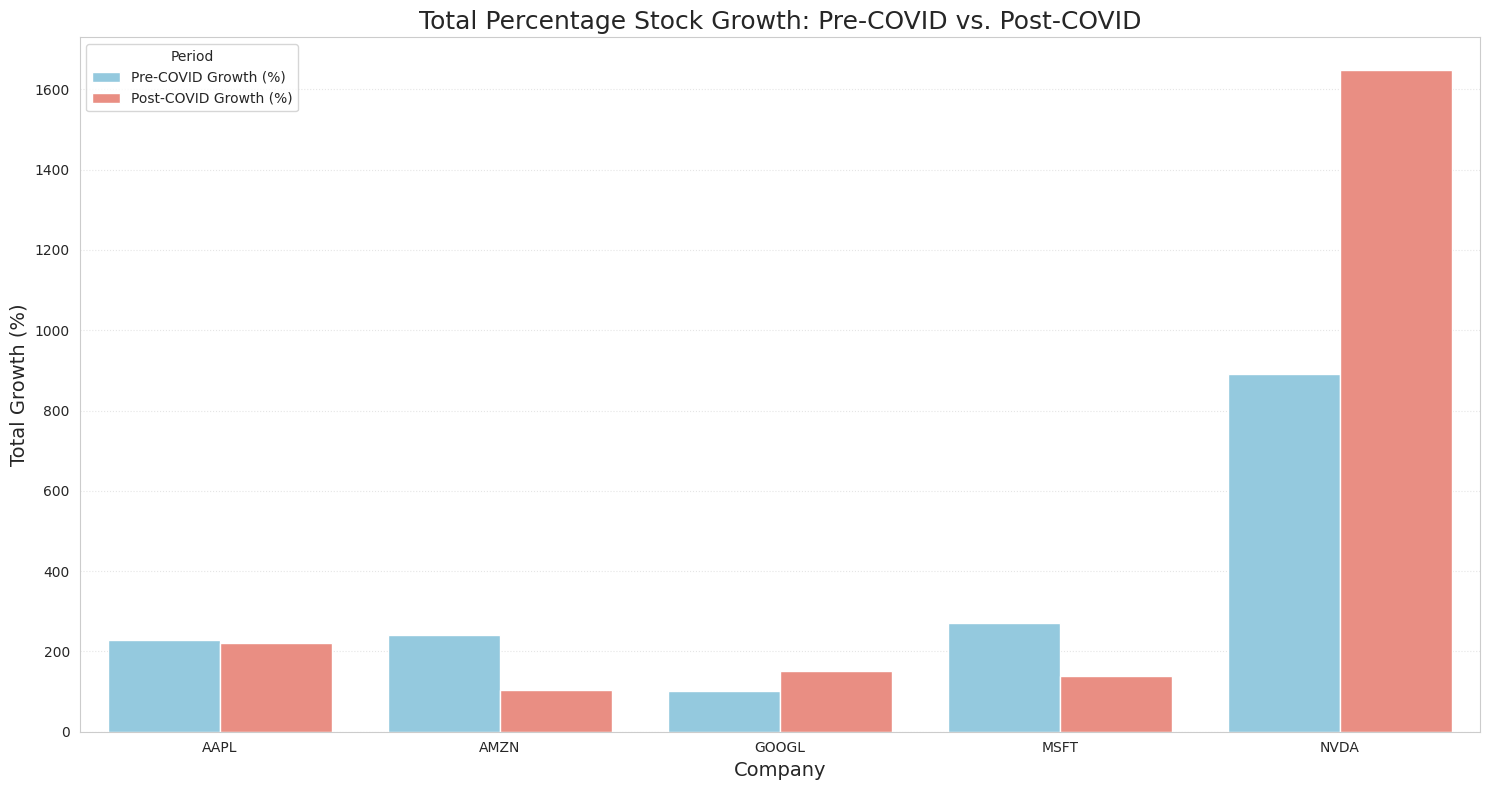

In [ ]:
# Split close_prices_df into pre-COVID and post-COVID periods
pre_covid_close_prices = close_prices_df[close_prices_df.index < covid_demarcation_date]
post_covid_close_prices = close_prices_df[close_prices_df.index >= covid_demarcation_date]

# Calculate total percentage growth for each period
# Growth = (End_Price - Start_Price) / Start_Price * 100

# Pre-COVID growth
pre_covid_growth_pct = ((pre_covid_close_prices.iloc[-1] - pre_covid_close_prices.iloc[0]) / pre_covid_close_prices.iloc[0]) * 100

# Post-COVID growth
post_covid_growth_pct = ((post_covid_close_prices.iloc[-1] - post_covid_close_prices.iloc[0]) / post_covid_close_prices.iloc[0]) * 100

# Combine into a single DataFrame for plotting
growth_comparison_df = pd.DataFrame({
    'Pre-COVID Growth (%)': pre_covid_growth_pct,
    'Post-COVID Growth (%)': post_covid_growth_pct
}).reset_index()

# Rename the 'index' column to 'Company'
growth_comparison_df = growth_comparison_df.rename(columns={'index': 'Company'})



# Melting the DataFrame for barplot
growth_melted = growth_comparison_df.melt(id_vars='Company', var_name='Period', value_name='Total Growth (%)')

plt.figure(figsize=(15, 8))
sns.barplot(x='Company', y='Total Growth (%)', hue='Period', data=growth_melted, palette={'Pre-COVID Growth (%)': 'skyblue', 'Post-COVID Growth (%)': 'salmon'})

plt.title('Total Percentage Stock Growth: Pre-COVID vs. Post-COVID', fontsize=18)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Total Growth (%)', fontsize=14)

##
#plt.ylim(growth_melted['Total Growth (%)'].min() * 1.05, growth_melted['Total Growth (%)'].max() * 1.05) # Adjust y-axis limits dynamically commented out this line
plt.ylim(0, growth_melted['Total Growth (%)'].max() * 1.05)
##
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

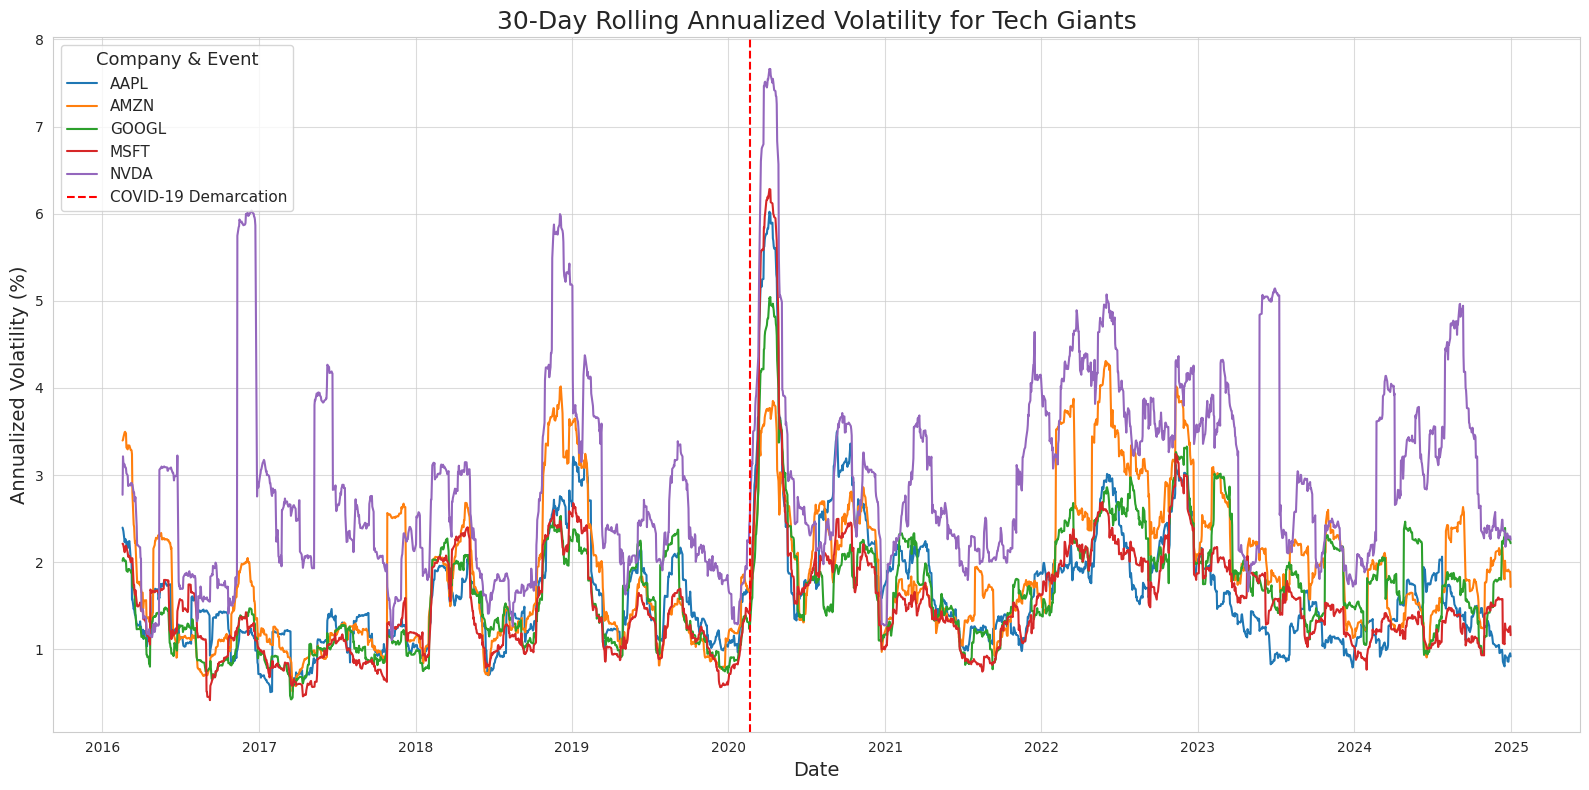

In [ ]:

rolling_window = 30 # Define the rolling window (e.g., 30 trading days)

plt.figure(figsize=(16, 8))

for company in daily_returns_df.columns:
    # Calculate rolling standard deviation of daily returns
    rolling_std = daily_returns_df[company].rolling(window=rolling_window).std() *100
    sns.lineplot(data=rolling_std, label=f'{company}')

# COVID demarcation line
plt.axvline(pd.to_datetime(covid_demarcation_date), color='r', linestyle='--', linewidth=1.5, label='COVID-19 Demarcation')

plt.title(f'{rolling_window}-Day Rolling Annualized Volatility for Tech Giants', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel(f'Annualized Volatility (%)', fontsize=14)
plt.legend(title='Company & Event', title_fontsize='13', fontsize=11, loc='upper left')
plt.grid(True, which="major", ls="-", alpha=0.7)
plt.grid(True, which="minor", ls=":", alpha=0.4)
plt.tight_layout()
plt.show()


The Great Tech Rollercoaster: What if you invested $1000 just before the pandemic?
Investing on 2020-02-19 and holding until 2024-12-31

--- Investment Performance Summary ---
 NVDA: Started with $1,000.00, ended with $17,140.51. Profit/Loss: $16,140.51 (1614.05%)
 AAPL: Started with $1,000.00, ended with $3,185.11. Profit/Loss: $2,185.11 (218.51%)
 GOOGL: Started with $1,000.00, ended with $2,491.84. Profit/Loss: $1,491.84 (149.18%)
 MSFT: Started with $1,000.00, ended with $2,346.62. Profit/Loss: $1,346.62 (134.66%)
 AMZN: Started with $1,000.00, ended with $2,021.82. Profit/Loss: $1,021.82 (102.18%)

---  Star Performers & Notable Mentions  ---
Best Performer: NVDA turned $1,000.00 into an astonishing $17,140.51!
Least Growth (or Loss): AMZN saw $1,000.00 become $2,021.82.


<ipython-input-21-f6a8a2156851>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Company', y=f'Initial ${initial_investment} Grew To', data=investment_df_sorted, palette=colors)
<ipython-input-21-f6a8a2156851>:57: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  barplot = sns.barplot(x='Company', y=f'Initial ${initial_investment} Grew To', data=investment_df_sorted, palette=colors)


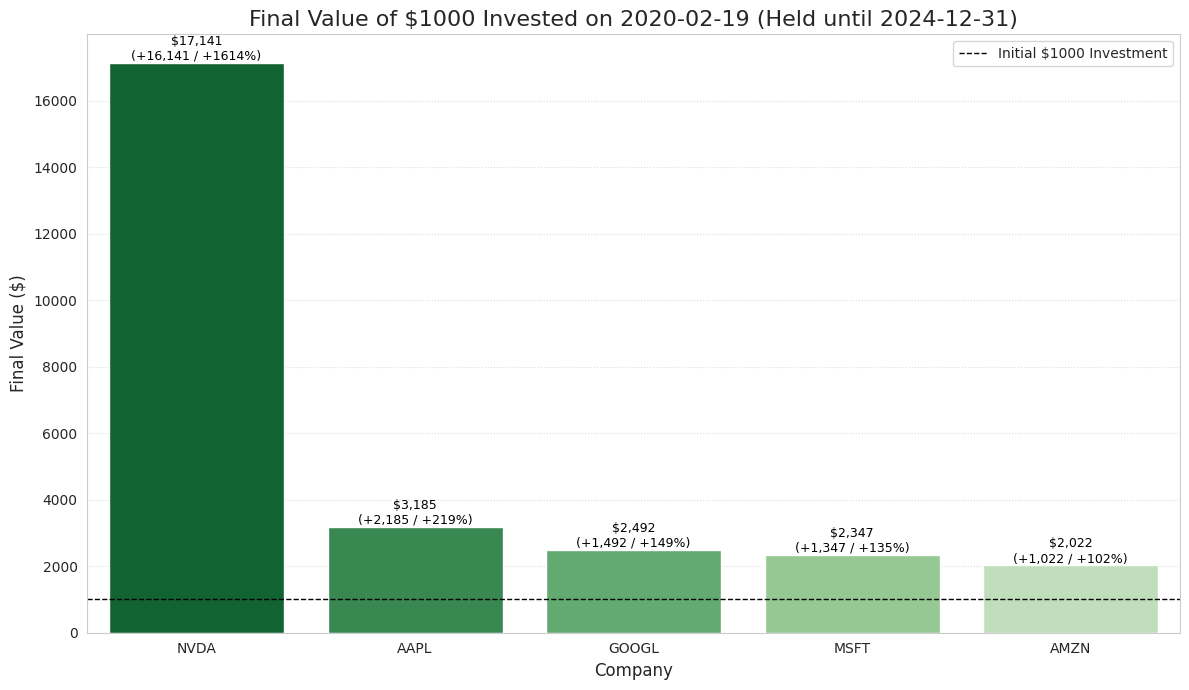

In [ ]:
# What If you made a $1000 Investment?
initial_investment = 1000
investment_results = []


investment_start_date = pre_covid_close_prices.index[-1].date()
investment_end_date = post_covid_close_prices.index[-1].date()

print(f"\nThe Great Tech Rollercoaster: What if you invested ${initial_investment} just before the pandemic?")
print(f"Investing on {investment_start_date} and holding until {investment_end_date}\n")

for company in close_prices_df.columns:

    price_at_covid_start = pre_covid_close_prices[company].iloc[-1] ##price at the start
    price_at_end_data = post_covid_close_prices[company].iloc[-1] ##price at the end

    num_shares = initial_investment / price_at_covid_start
    final_value = num_shares * price_at_end_data
    profit_loss = final_value - initial_investment
    growth_pct = (profit_loss / initial_investment) * 100

    investment_results.append({
        'Company': company,
        'Initial Price': price_at_covid_start,
        'Final Price': price_at_end_data,
        f'Initial ${initial_investment} Grew To': final_value,
        'Profit/Loss ($)': profit_loss,
        'Growth (%)': growth_pct
    })


investment_df = pd.DataFrame(investment_results)
investment_df_sorted = investment_df.sort_values(by='Growth (%)', ascending=False)

print("--- Investment Performance Summary ---")

for index, row in investment_df_sorted.iterrows():
    print(f" {row['Company']}: Started with ${initial_investment:,.2f}, ended with ${row[f'Initial ${initial_investment} Grew To']:,.2f}. "
          f"Profit/Loss: ${row['Profit/Loss ($)']:,.2f} ({row['Growth (%)']:.2f}%)")

best_performer = investment_df_sorted.iloc[0]
worst_performer = investment_df_sorted.iloc[-1]

print("\n---  Star Performers & Notable Mentions  ---")
print(f"Best Performer: {best_performer['Company']} turned ${initial_investment:,.2f} into an astonishing ${best_performer[f'Initial ${initial_investment} Grew To']:,.2f}!")
if len(investment_df_sorted) > 1:
    print(f"Least Growth (or Loss): {worst_performer['Company']} saw ${initial_investment:,.2f} become ${worst_performer[f'Initial ${initial_investment} Grew To']:,.2f}.")

######## plotting

plt.figure(figsize=(12, 7))



colors = sns.color_palette(palette='Greens')[::-1]

barplot = sns.barplot(x='Company', y=f'Initial ${initial_investment} Grew To', data=investment_df_sorted, palette=colors)

# Add initial investment line for reference
plt.axhline(initial_investment, color='black', linestyle='--', linewidth=1, label=f'Initial ${initial_investment} Investment')

# Add text annotations for final values
for i, bar in enumerate(barplot.patches):
    final_val = investment_df_sorted[f'Initial ${initial_investment} Grew To'].iloc[i]
    profit_val = investment_df_sorted['Profit/Loss ($)'].iloc[i]
    growth_pct_val = investment_df_sorted['Growth (%)'].iloc[i]

    text_y_position = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, text_y_position,
              f'${final_val:,.0f}\n(+{profit_val:,.0f} / +{growth_pct_val:.0f}%)',
              ha='center', va='bottom' if profit_val >=0 else 'top', fontsize=9, color='black')

plt.title(f'Final Value of ${initial_investment} Invested on {investment_start_date} (Held until {investment_end_date})', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel(f'Final Value ($)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
##1000$ after covid potentiaal plot

In [ ]:
## new hypothesis test
#research question: did the proportion of days where tech companies closed higher than when they opened (up days) significantly change after the covid pandemic?
#H0: The proportion of "up" days for Companies pre-COVID is equal to post-COVID.
#H1: The proportions are different.

##I'll be running a z-test

test_results_list = []
plot_data_list = []
alpha = 0.05

company_tickers = sorted(list(set([col.split('_')[1] for col in ohlc_df.columns if '_' in col])))

print("\n--- Performing Z Test for each company's up days proportion ---")

for company in company_tickers:
    open_col = f'Open_{company}'
    close_col = f'Close_{company}'



    ##pre covid

    company_slice_pre = pre_covid_ohlc_df[[open_col, close_col]]
    valid_data_pre = company_slice_pre.dropna()

    up_days_pre = (valid_data_pre[close_col] > valid_data_pre[open_col]).sum()
    down_days_pre = (valid_data_pre[close_col] < valid_data_pre[open_col]).sum()
    flat_days_pre = (valid_data_pre[close_col] == valid_data_pre[open_col]).sum()
    total_days_pre = len(valid_data_pre)

    proportion_up_pre = up_days_pre / total_days_pre if total_days_pre > 0 else 0

    plot_data_list.append({'Company': company,
                           'Period': 'Pre-COVID',
                           'Direction': 'Up Days',
                           'Proportion': proportion_up_pre})
    plot_data_list.append({'Company': company,
                           'Period': 'Pre-COVID',
                           'Direction': 'Down Days',
                           'Proportion': (down_days_pre / total_days_pre if total_days_pre > 0 else 0)})
    plot_data_list.append({'Company': company,
                           'Period': 'Pre-COVID',
                           'Direction': 'Flat Days',
                           'Proportion': (flat_days_pre / total_days_pre if total_days_pre > 0 else 0)})

    ##post covid

    company_slice_post = post_covid_ohlc_df[[open_col, close_col]]
    valid_data_post = company_slice_post.dropna()

    up_days_post = (valid_data_post[close_col] > valid_data_post[open_col]).sum()
    down_days_post = (valid_data_post[close_col] < valid_data_post[open_col]).sum()
    flat_days_post = (valid_data_post[close_col] == valid_data_post[open_col]).sum()
    total_days_post = len(valid_data_post)

    proportion_up_post = up_days_post / total_days_post if total_days_post > 0 else 0

    plot_data_list.append({'Company': company,
                                    'Period': 'Post-COVID',
                                    'Direction': 'Up Days',
                                    'Proportion': proportion_up_post})
    plot_data_list.append({'Company': company,
                                    'Period': 'Post-COVID',
                                    'Direction': 'Down Days',
                                    'Proportion': (down_days_post / total_days_post if total_days_post > 0 else 0)})
    plot_data_list.append({'Company': company,
                                    'Period': 'Post-COVID',
                                    'Direction': 'Flat Days',
                                    'Proportion': (flat_days_post / total_days_post if total_days_post > 0 else 0)})

    #perform the z-test
    count = np.array([up_days_pre, up_days_post])
    nobs = np.array([total_days_pre, total_days_post])

    z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')


    conclusion = "Reject H0 (Significant Change)" if p_value < alpha else "Fail to Reject H0 (No Significant Change)"

    test_results_list.append({
        'Company': company,
        'Prop_Up_Pre (Close>Open)': proportion_up_pre,
        'Prop_Up_Post (Close>Open)': proportion_up_post,
        'Z_Statistic': z_stat,
        'P_Value': p_value,
        'Conclusion': conclusion
    })

test_display_df = pd.DataFrame(test_results_list)
plot_df_intraday_viz = pd.DataFrame(plot_data_list)

#display results
print("\n--- Summary of Z Test Results ---")
print(test_display_df.to_string(index=False))





--- Performing Z Test for each company's up days proportion ---

--- Summary of Z Test Results ---
Company  Prop_Up_Pre (Close>Open)  Prop_Up_Post (Close>Open)  Z_Statistic  P_Value                                Conclusion
   AAPL                  0.508434                   0.496899     0.408777 0.682704 Fail to Reject H0 (No Significant Change)
   AMZN                  0.508434                   0.492248     0.573628 0.566220 Fail to Reject H0 (No Significant Change)
  GOOGL                  0.438554                   0.506202    -2.397888 0.016490            Reject H0 (Significant Change)
   MSFT                  0.484337                   0.509302    -0.884763 0.376285 Fail to Reject H0 (No Significant Change)
   NVDA                  0.513253                   0.522481    -0.327289 0.743449 Fail to Reject H0 (No Significant Change)


<ipython-input-23-913e6b901cca>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


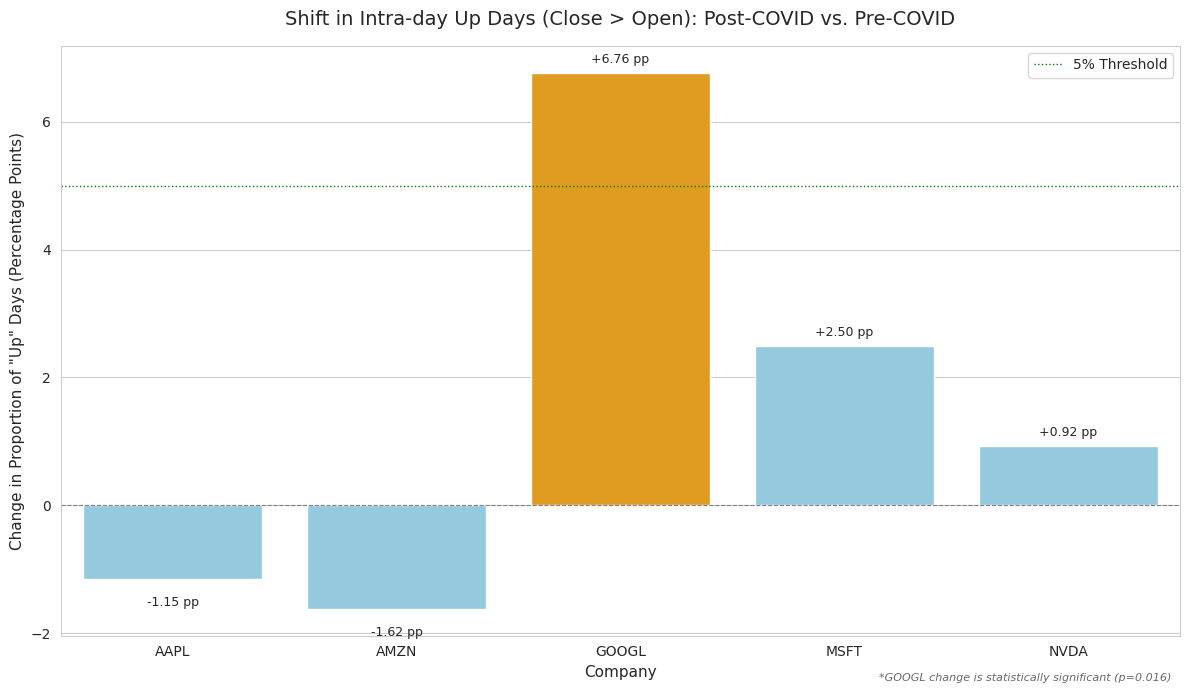

In [ ]:
###########plotting

#Calculate the change in proportions
change_df = test_display_df.copy()
change_df['Change_in_Prop_Up_Days (pp)'] = (change_df['Prop_Up_Post (Close>Open)'] - change_df['Prop_Up_Pre (Close>Open)']) * 100

#Sort by company name for consistent plotting order (optional, or sort by change if preferred)
change_df = change_df.sort_values(by='Company')

company_colors = []
for company_name in change_df['Company']:
    if company_name == 'GOOGL':
        company_colors.append('orange') # Highlight color for Google
    else:
        company_colors.append('skyblue') # Default color for other companies

barplot = sns.barplot(
    x='Company',
    y='Change_in_Prop_Up_Days (pp)',
    data=change_df,
    palette=company_colors
)

plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')

plt.ylabel('Change in Proportion of "Up" Days (Percentage Points)', fontsize=11)
plt.xlabel('Company', fontsize=11)
plt.title('Shift in Intra-day Up Days (Close > Open): Post-COVID vs. Pre-COVID', fontsize=14, pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for bar_patch in barplot.patches:
    # Get X and Y placement of label
    y_value = bar_patch.get_height()
    x_value = bar_patch.get_x() + bar_patch.get_width() / 2.

    # Format the label
    label = f"{y_value:+.2f} pp" # Show with sign and 2 decimal places

    # Vertical alignment
    va = 'bottom' if y_value >= 0 else 'top'
    # Offset for the label
    y_offset = 5 if y_value >= 0 else -12 # Adjust offset based on bar direction

    barplot.annotate(
        label,
        (x_value, y_value),
        xytext=(0, y_offset), # Offset label slightly
        textcoords="offset points",
        ha='center',
        va=va,
        fontsize=9
    )

google_p_value_series = test_display_df[test_display_df['Company'] == 'GOOGL']['P_Value']
google_p_value = google_p_value_series.iloc[0]
plt.figtext(0.98, 0.02, f'*GOOGL change is statistically significant (p={google_p_value:.3f})', horizontalalignment='right', fontsize=8, style='italic', color='dimgray')

practical_significance_threshold = 5 #alpha value

plt.axhline(practical_significance_threshold, color='green', linestyle=':', linewidth=1, label=f'5% Threshold')

plt.legend()

plt.tight_layout()
plt.show()

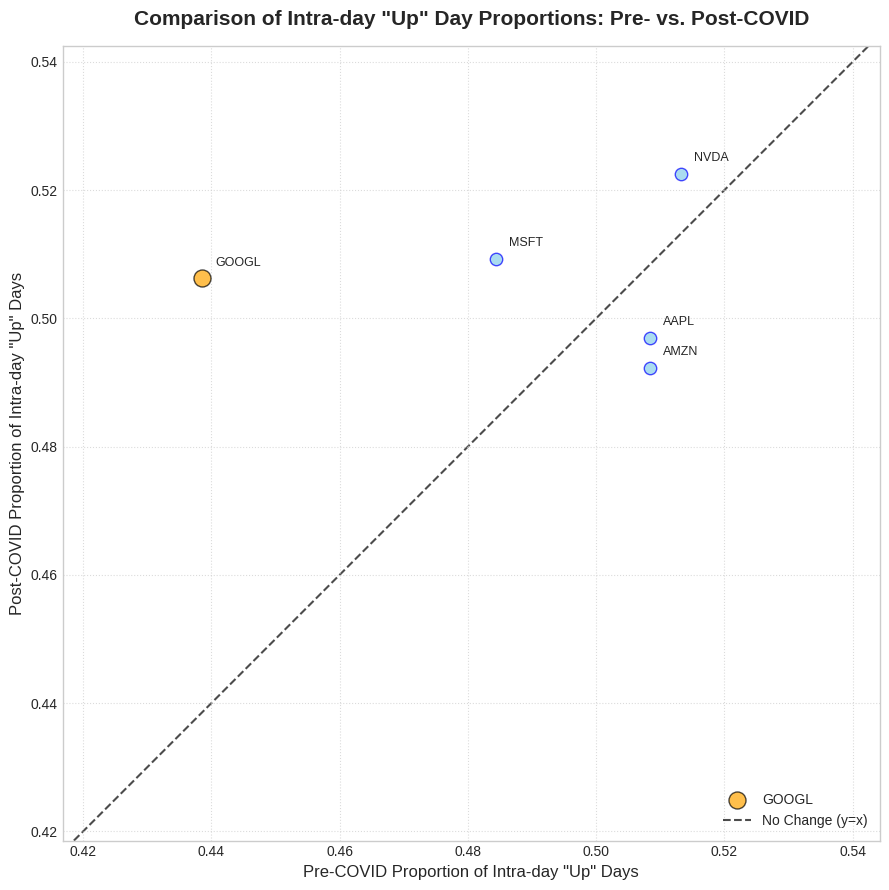

In [ ]:
######plotting

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(9, 9)) # Square figure often good for scatter plots comparing two same-scale metrics

# Create the scatter plot
# Highlight Google by making its marker different or larger/more colorful
for i, row in test_display_df.iterrows():
    marker_size = 150 if row['Company'] == 'GOOGL' else 80
    marker_color = 'orange' if row['Company'] == 'GOOGL' else 'skyblue'
    marker_edge = 'black' if row['Company'] == 'GOOGL' else 'blue'

    plt.scatter(row['Prop_Up_Pre (Close>Open)'], row['Prop_Up_Post (Close>Open)'],
                s=marker_size,
                color=marker_color,
                alpha=0.7,
                edgecolor=marker_edge,
                label=row['Company'] if row['Company'] == 'GOOGL' else None) # Only label Google once for legend

    # Annotate each point with the company name
    plt.text(row['Prop_Up_Pre (Close>Open)'] + 0.002, # Slight offset for text
             row['Prop_Up_Post (Close>Open)'] + 0.002,
             row['Company'],
             fontsize=9)

# Add a y=x line (line of no change)
lims = [
    min(plt.xlim()[0], plt.ylim()[0], test_display_df['Prop_Up_Pre (Close>Open)'].min() - 0.02, test_display_df['Prop_Up_Post (Close>Open)'].min() - 0.02),
    max(plt.xlim()[1], plt.ylim()[1], test_display_df['Prop_Up_Pre (Close>Open)'].max() + 0.02, test_display_df['Prop_Up_Post (Close>Open)'].max() + 0.02)
]
plt.plot(lims, lims, 'k--', alpha=0.7, zorder=0, label='No Change (y=x)') # Dashed black line

# Add labels and title
plt.xlabel('Pre-COVID Proportion of Intra-day "Up" Days', fontsize=12)
plt.ylabel('Post-COVID Proportion of Intra-day "Up" Days', fontsize=12)
plt.title('Comparison of Intra-day "Up" Day Proportions: Pre- vs. Post-COVID', fontsize=15, weight='bold', pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axis('equal') # Ensure x and y axes have the same scale for a proper 45-degree line
plt.xlim(lims)
plt.ylim(lims)

plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
  pre_covid = df[df.index < '2020-02-20']
  post_covid = df[df.index >= '2020-02-20']

  # Calculate daily returns (%)
  returns_pre = pre_covid[[col for col in df.columns if 'Close' in col]].pct_change() * 100
  returns_post = post_covid[[col for col in df.columns if 'Close' in col]].pct_change() * 100
  returns_pre.columns = [col.replace('Close_', '') for col in returns_pre.columns]
  returns_post.columns = [col.replace('Close_', '') for col in returns_post.columns]

  # Drop NaN
  returns_pre = returns_pre.dropna()
  returns_post = returns_post.dropna()

  proportion_results = []
  companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']

  for company in companies:
      pre_positive = np.sum(pre_covid[f'Close_{company}'] > pre_covid[f'Open_{company}'])
      post_positive = np.sum(post_covid[f'Close_{company}'] > post_covid[f'Open_{company}'])
      pre_n = len(pre_covid)
      post_n = len(post_covid)
      stat, pval = proportions_ztest([pre_positive, post_positive], [pre_n, post_n])
      conclusion = 'Reject H₀ (proportions differ)' if pval < 0.05 else 'Fail to reject H₀'
      proportion_results.append({
          'Company': company,
          'Pre-COVID Prop': pre_positive / pre_n,
          'Post-COVID Prop': post_positive / post_n,
          'Z-Statistic': stat,
          'P-Value': pval,
          'Conclusion': conclusion
      })
  prop_df = pd.DataFrame(proportion_results)
  print("\nProportion Z-Test Results:")
  print(prop_df)


Proportion Z-Test Results:
  Company  Pre-COVID Prop  Post-COVID Prop  Z-Statistic   P-Value  \
0    AAPL        0.545717         0.542857     0.136150  0.891702   
1    AMZN        0.496631         0.500408    -0.179098  0.857860   
2   GOOGL        0.516843         0.538776    -1.041767  0.297520   
3    MSFT        0.538017         0.529796     0.390746  0.695985   
4    NVDA        0.526468         0.514286     0.578138  0.563171   

          Conclusion  
0  Fail to reject H₀  
1  Fail to reject H₀  
2  Fail to reject H₀  
3  Fail to reject H₀  
4  Fail to reject H₀  


In [ ]:
#Predicting Stock trajectories with prophet!
!pip install prophet
from prophet import Prophet
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Define the split point for training and testing
last_date = close_prices_df.index.max()
# Set train_end_date to be roughly 6 months before the last available date
train_end_date = last_date - pd.Timedelta(days=6*30)

# Adjust train_end_date to the last actual trading day before the target date
# This ensures we don't pick a non-trading day as the split point
train_end_date = close_prices_df.index[close_prices_df.index <= train_end_date].max()


print(f"Prediction will be made for the period: {train_end_date.date() + pd.Timedelta(days=1)} to {last_date.date()}")
print(f"Training data up to: {train_end_date.date()}")
print(f"Test data length: {len(close_prices_df[close_prices_df.index > train_end_date])} days")

# Store prediction results and evaluation metrics for all stocks
all_predictions_data = {}
all_evaluation_metrics = []

Prediction will be made for the period: 2024-07-04 to 2024-12-31
Training data up to: 2024-07-03
Test data length: 125 days


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/w9pgcp_g.json



--- Predicting for AAPL ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/zbloo0i6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2246', 'data', 'file=/tmp/tmpnngw8r7x/w9pgcp_g.json', 'init=/tmp/tmpnngw8r7x/zbloo0i6.json', 'output', 'file=/tmp/tmpnngw8r7x/prophet_modelvh27imhp/prophet_model-20250524094301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


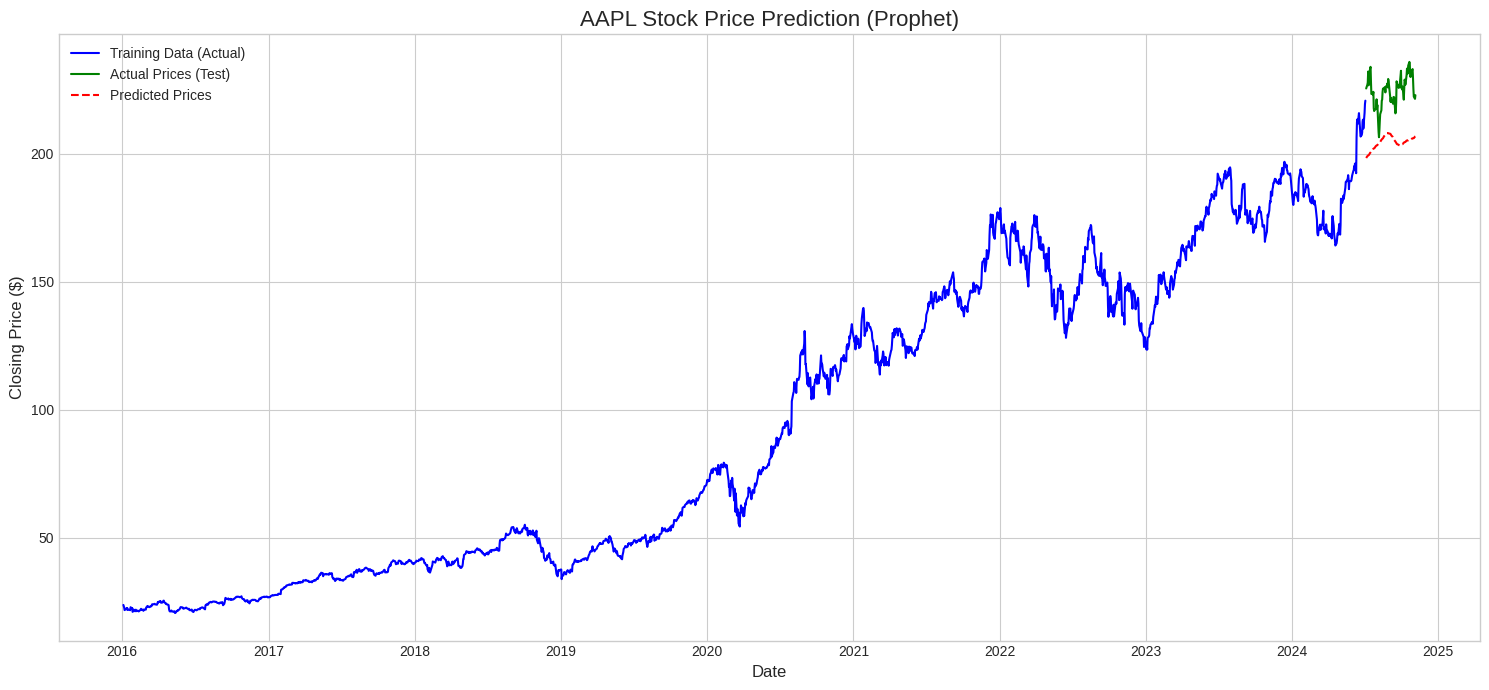

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/hoi0cyp4.json



--- Predicting for AMZN ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/7u34nv8s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79576', 'data', 'file=/tmp/tmpnngw8r7x/hoi0cyp4.json', 'init=/tmp/tmpnngw8r7x/7u34nv8s.json', 'output', 'file=/tmp/tmpnngw8r7x/prophet_modelq6zmf3ol/prophet_model-20250524094304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


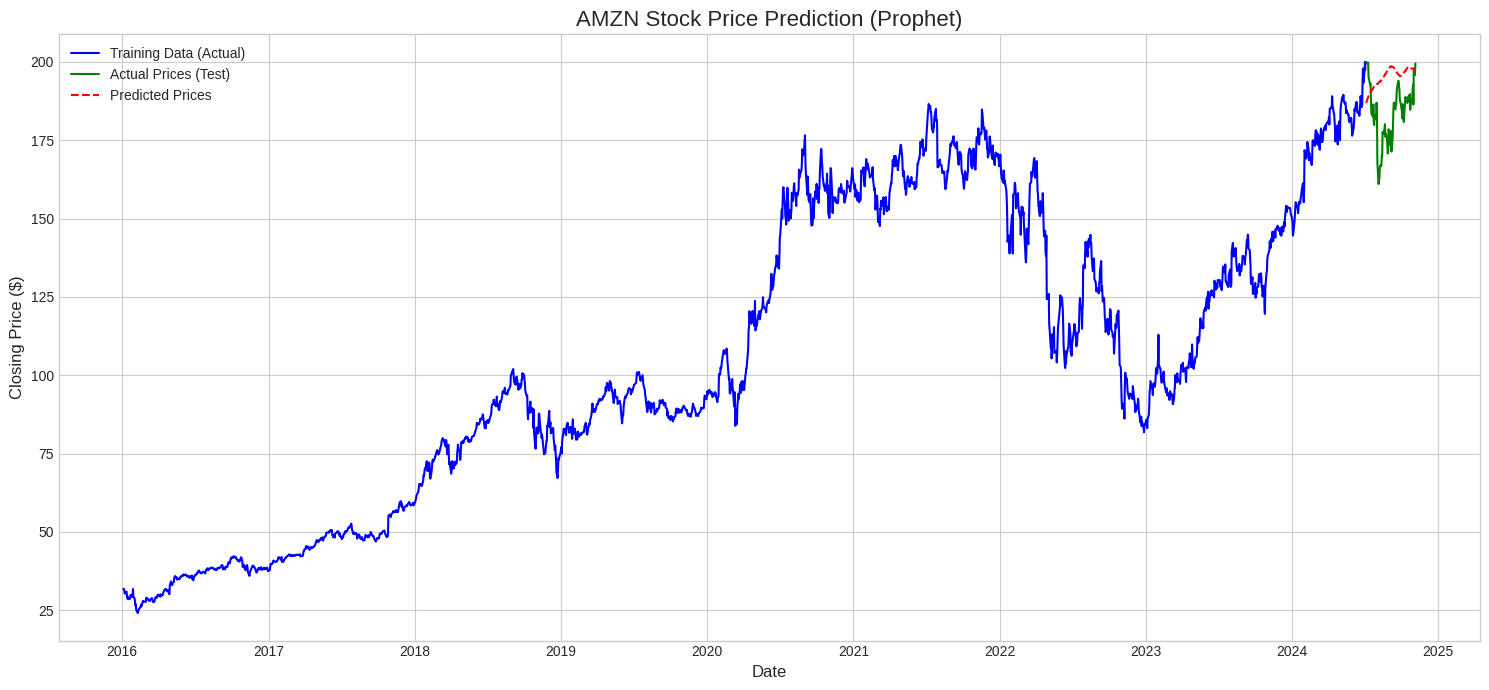

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/yczs2471.json



--- Predicting for GOOGL ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/kgti_678.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35192', 'data', 'file=/tmp/tmpnngw8r7x/yczs2471.json', 'init=/tmp/tmpnngw8r7x/kgti_678.json', 'output', 'file=/tmp/tmpnngw8r7x/prophet_model_9d4ng1k/prophet_model-20250524094310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


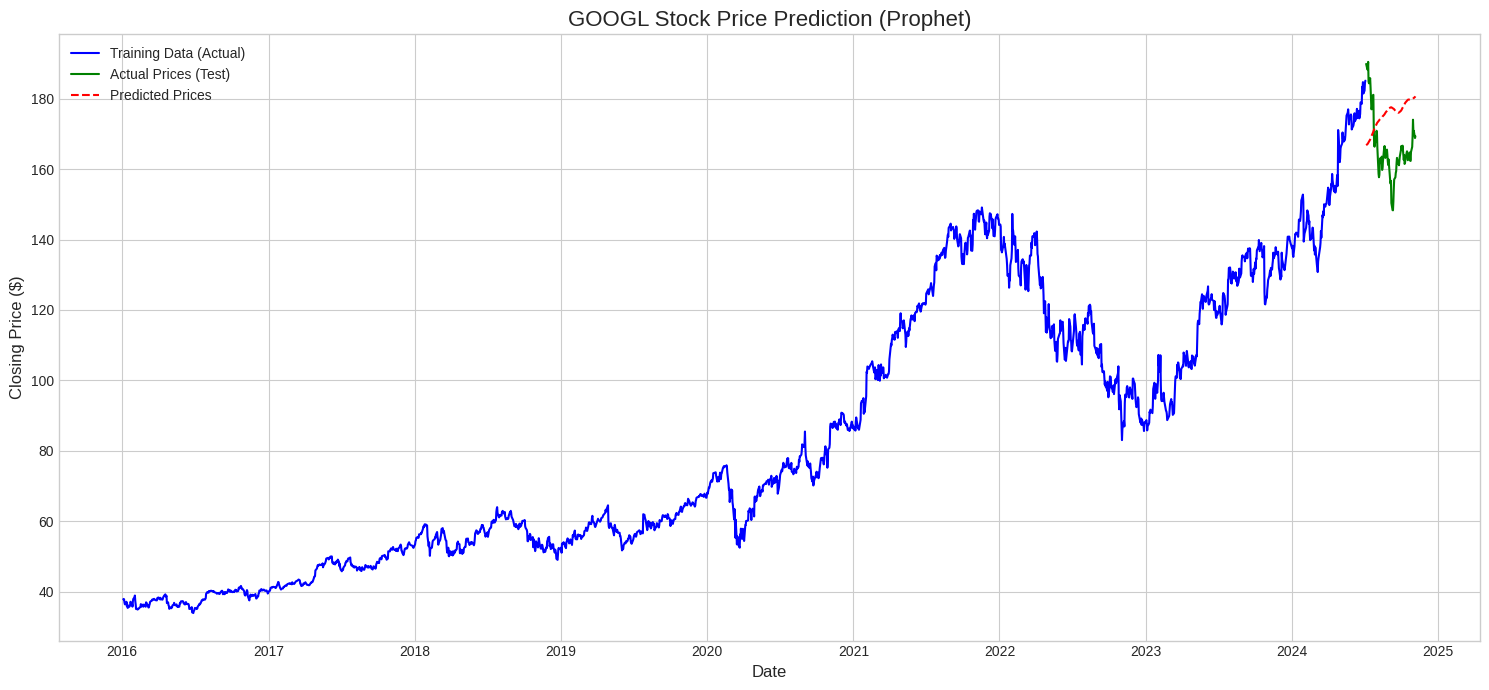

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/5kfykr65.json



--- Predicting for MSFT ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/5cfkxpq8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5523', 'data', 'file=/tmp/tmpnngw8r7x/5kfykr65.json', 'init=/tmp/tmpnngw8r7x/5cfkxpq8.json', 'output', 'file=/tmp/tmpnngw8r7x/prophet_modeld2hyn5ib/prophet_model-20250524094314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


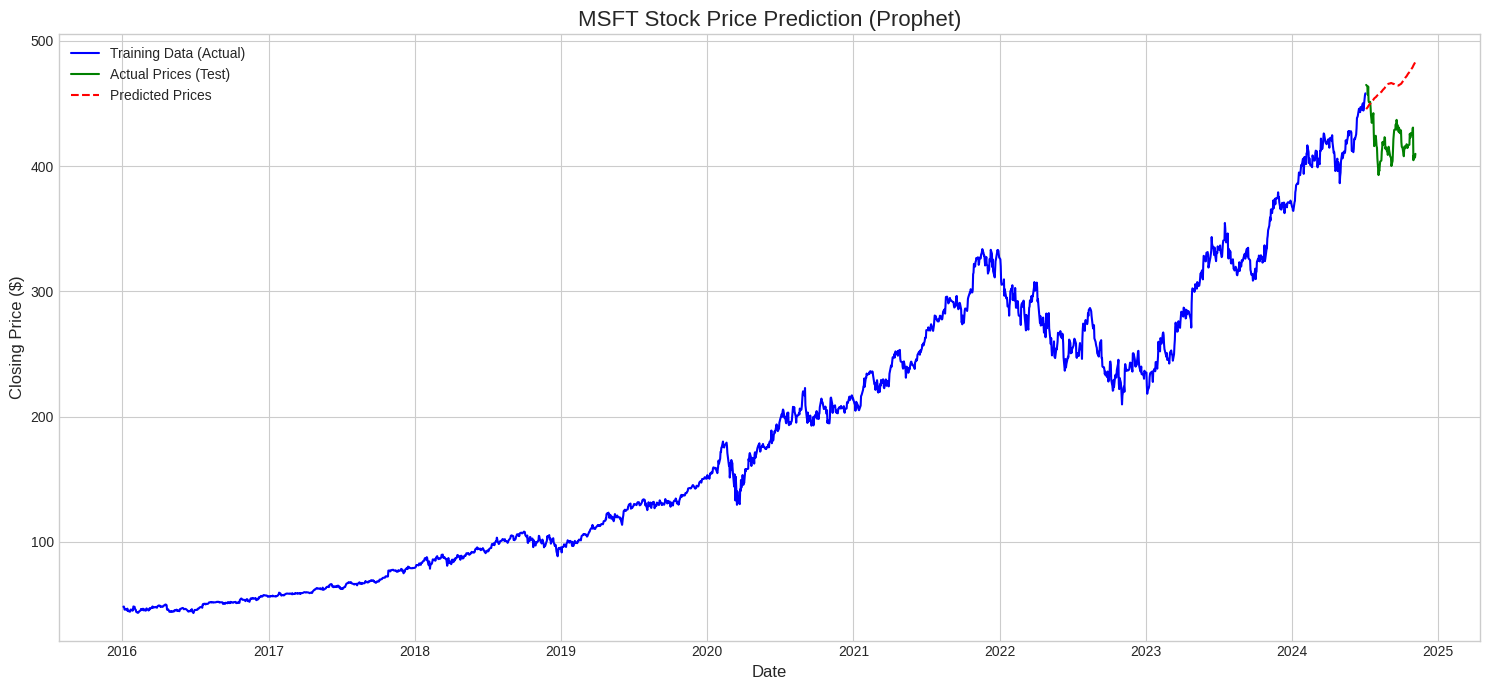

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/24jzx2nc.json



--- Predicting for NVDA ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpnngw8r7x/2h52y1lb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15206', 'data', 'file=/tmp/tmpnngw8r7x/24jzx2nc.json', 'init=/tmp/tmpnngw8r7x/2h52y1lb.json', 'output', 'file=/tmp/tmpnngw8r7x/prophet_modelcd6yr_kd/prophet_model-20250524094319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


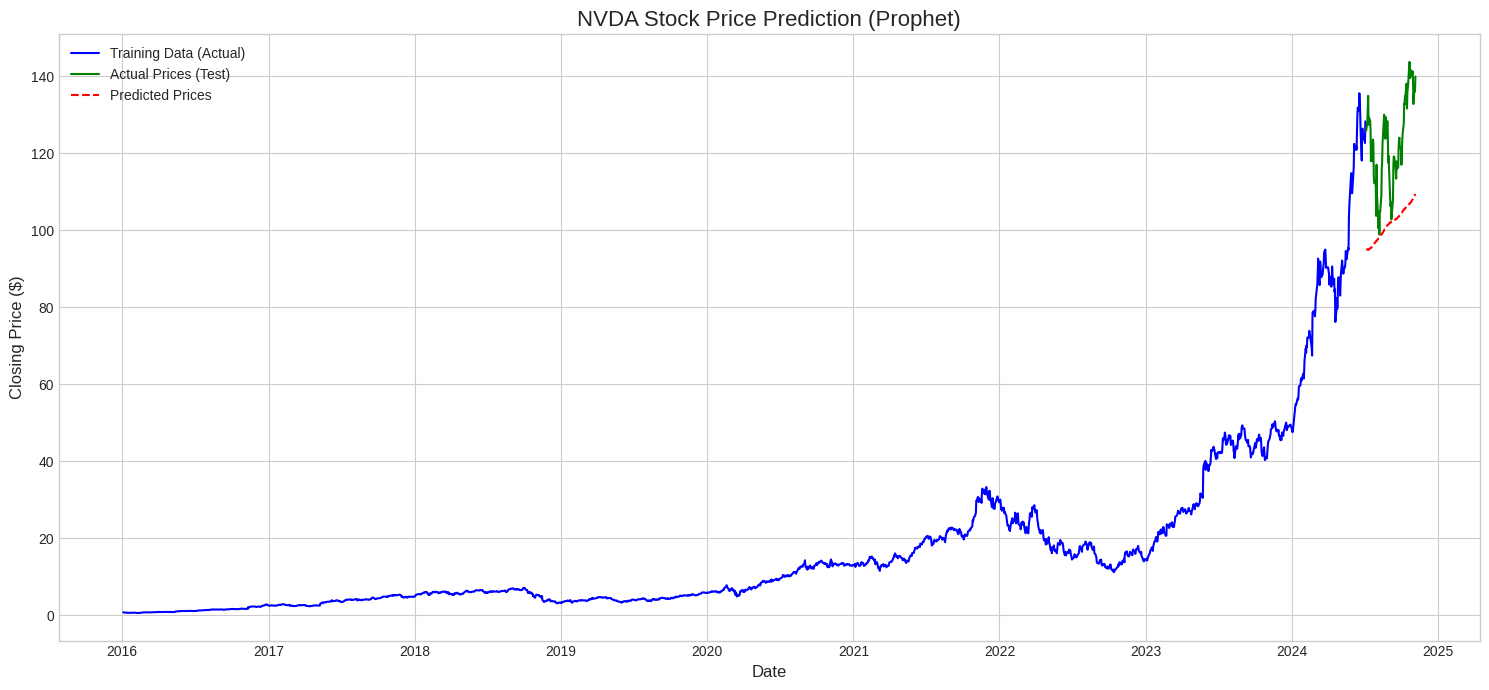

In [ ]:
for stock_ticker in close_prices_df.columns:
    print(f"\n--- Predicting for {stock_ticker} ---")

    # Create the DataFrame for Prophet (ds, y)
    df_prophet = close_prices_df[[stock_ticker]].reset_index()
    df_prophet.columns = ['ds', 'y']

    # Split data into training and testing sets
    train_df = df_prophet[df_prophet['ds'] <= train_end_date]
    test_df = df_prophet[df_prophet['ds'] > train_end_date]

    # Skip if test set is empty (e.g., if dataset is too short for 6 months test data)
    if test_df.empty:
        print(f"  Skipping {stock_ticker}: Not enough data for the defined test period. Adjust test period if necessary.")
        continue

    # Instantiate Prophet model
    # daily_seasonality=True attempts to capture daily patterns (e.g., Monday effect)
    # changepoint_prior_scale: Adjusts flexibility of trend. Lower = less flexible. Default is 0.05.
    # Set to a slightly lower value like 0.01-0.03 for potentially smoother trends less prone to overfitting noise.
    model = Prophet(daily_seasonality=True, changepoint_prior_scale=0.02)

    # Fit the model to the training data
    model.fit(train_df)

    # Create future DataFrame for prediction.
    # 'periods' is the number of days to predict into the future (equal to test set length)
    # 'include_history=False' ensures we only predict for the future, not re-predict training data
    future = model.make_future_dataframe(periods=len(test_df), include_history=False)

    # Generate forecast
    forecast = model.predict(future)

    # Align predictions with actual test data for evaluation
    # Use 'ds' as index for merging
    predicted_prices = forecast[['ds', 'yhat']].set_index('ds')
    actual_test_prices = test_df.set_index('ds')

    # Merge to ensure correct alignment and handle any potential date mismatches (e.g., holidays)
    comparison_df = actual_test_prices.join(predicted_prices, how='inner')

    # Ensure comparison_df is not empty after inner join (can happen if date ranges don't perfectly align)
    if comparison_df.empty:
        print(f"  Skipping {stock_ticker}: No overlapping dates between test data and forecast after alignment. This might be due to missing dates in actual data or prediction horizon beyond available data.")
        continue

    # Evaluate the model
    rmse = sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))
    mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])

    # MAPE calculation (handle division by zero for actual price if y can be 0)
    # For stock prices, y should not be zero, but good practice to be robust
    mape = np.mean(np.abs((comparison_df['y'] - comparison_df['yhat']) / comparison_df['y'].replace(0, np.nan).dropna())) * 100

    all_evaluation_metrics.append({
        'Stock': stock_ticker,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape
    })

    # Visualize the prediction
    plt.figure(figsize=(15, 7))
    plt.plot(train_df['ds'], train_df['y'], label='Training Data (Actual)', color='blue')
    plt.plot(comparison_df.index, comparison_df['y'], label='Actual Prices (Test)', color='green')
    plt.plot(comparison_df.index, comparison_df['yhat'], label='Predicted Prices', color='red', linestyle='--')


    plt.title(f'{stock_ticker} Stock Price Prediction (Prophet)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price ($)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Store relevant data for overall analysis
    all_predictions_data[stock_ticker] = {
        'forecast_df': forecast, # full forecast df
        'comparison_df': comparison_df # actual vs predicted for test set
    }

In [ ]:
# Convert evaluation metrics list to a DataFrame for clean display
evaluation_df = pd.DataFrame(all_evaluation_metrics)
evaluation_df = evaluation_df.round(2) # Round to 2 decimal places for display

print("\n--- Prediction Model Evaluation Metrics ---")
print(evaluation_df.to_string(index=False))

print("\n" + "="*80)
print("END OF PREDICTION SECTION")
print("="*80)


--- Prediction Model Evaluation Metrics ---
Stock  RMSE   MAE  MAPE (%)
 AAPL 21.13 20.10      8.88
 AMZN 15.35 13.20      7.40
GOOGL 15.15 14.07      8.55
 MSFT 46.90 43.51     10.46
 NVDA 23.36 21.19     16.70

END OF PREDICTION SECTION
